# Prac 3

Preprocessing: Import libraries

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Q1  Make Scatterplots for each dataset. Import and plot

In [3]:
w3_classif = pd.read_csv('w3classif.csv', header=None)
w3_classif = w3_classif.rename(columns={0: "x1", 1: "x2", 2:'y'})

w3_regr = pd.read_csv('w3regr.csv', header=None)
w3_regr = w3_regr.rename(columns={0: "x1", 1: "y"})

print(w3_classif.head())


         x1        x2  y
0  0.475861  0.541139  0
1  1.412233 -1.540877  0
2  0.022608 -0.203143  0
3 -0.047869 -0.499965  0
4  1.701335  0.383024  0


Scatterplot for regression data

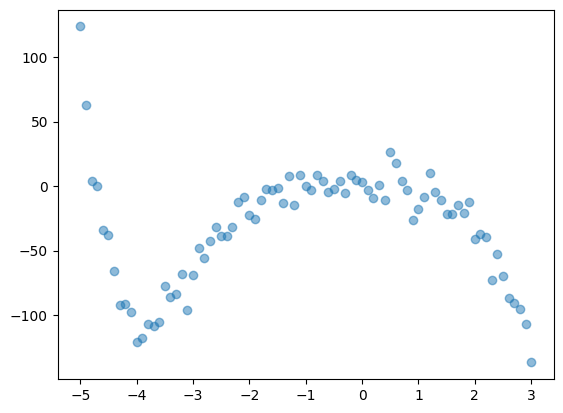

In [4]:
plt.scatter(w3_regr['x1'], w3_regr['y'], alpha=0.5)
plt.show()

Scatterplot for classification data

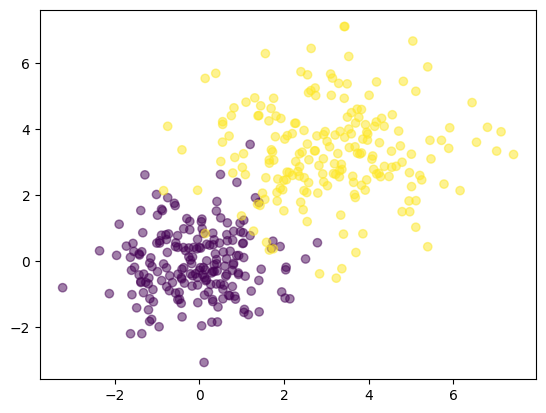

In [5]:
plt.scatter(w3_classif['x1'], w3_classif['x2'], c=w3_classif['y'], alpha=0.5)
plt.show()

#### Q2) Split test train data. import library from sklearn

In [10]:
from sklearn.model_selection import train_test_split

X = w3_classif[['x1', 'x2']]
y = w3_classif['y']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
print(X_train.head()) #test if this is working correctly


X2 = w3_regr['x1']
y2 = w3_regr['y']
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y2, test_size=0.30, random_state=42)



           x1        x2
157  0.886377  2.377412
109 -1.097868 -0.865815
17   0.213042 -0.938301
347  5.043473  6.654877
24  -1.314724 -0.398333


##### Q3) a Build a knn classifier
This method applies the DecisionBoundaryDisplay from sklearn. Observe the relative 'choppy' boundary

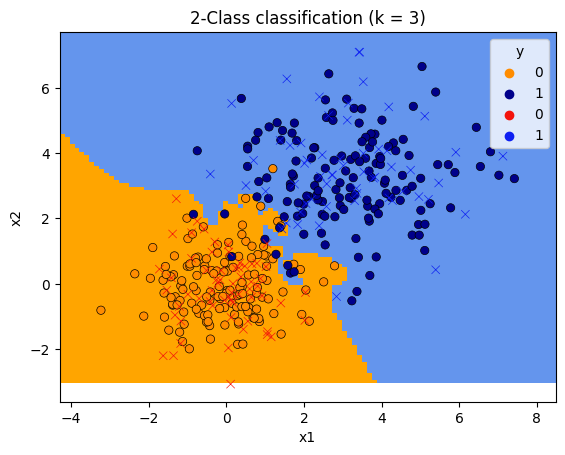

In [19]:
n_neighbors=3
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]
cmap_bold_2 = ["#f3130c", "#0d1ff2"]


# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel='x1',
    ylabel='x2',
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X_train['x1'],
    y=X_train['x2'],
    hue=y,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

# Plot also the test points
sns.scatterplot(
    x=X_test['x1'],
    y=X_test['x2'],
    hue=y,
    palette=cmap_bold_2,
    alpha=1.0,
    marker='x'
)

plt.title(
    "2-Class classification (k = %i)" % (n_neighbors)
    )

plt.show()

Alternatively, apply meshgrid. Observe the smoother defined boundaries

C:\Users\701da\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


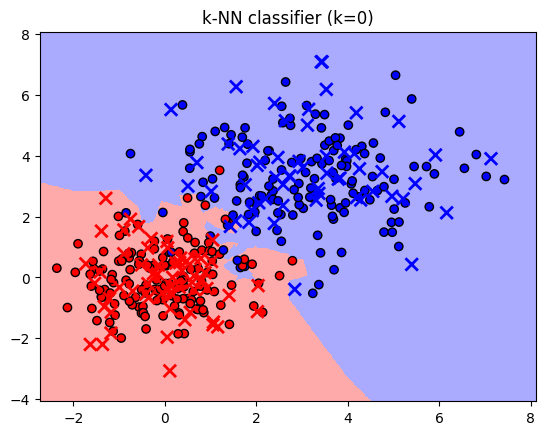

In [22]:
h = 0.02
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class of each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision regions
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points as dots with differentiating classification colour depending on y_value
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k')

# Plot the test points as 'x'
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold, marker='x', s=80, linewidths=2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"k-NN classifier (k={k})")
plt.show()

Determine the missclassification rate:

In [8]:
y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy

# Ratio of data points that have been removed from training set due to k value
print(f"\nTraining Loss: {1 - clf.score(x_training_set.values, y_training_set)}")



# Ratio of incorrect classifications of test data
print(f"Test Loss (Misclassification Rate): {misclassification_rate}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        58

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy score: 1.0


#### c) observe different k values for the knn classification

In [9]:
classification_rates = []

for k in range(25):
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)
    
    y_predict = clf.predict(X_test)
    classification_rates.append(accuracy_score(y_test, y_predict))

classification = pd.DataFrame(classification_rates, columns=['accuracy score'])
df = df.reset_index()
    

InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got 0 instead.